# Lab experiment
### You are a scientist who is working at Copenhagen University. Your research project is about identifying gases that reduce the global warming potential of greenhouse gases. In your most recent experiment you mixed two different gases. The chemical reaction made the temperature in the reaction tube vary over time, which was measured with 3 different thermometers. You're now back in your office and ready to analyse your data, which is available in a csv file

### The exercise might seem like a lot, but don't worry. Most of the visualisation questions were already solved during the exercises session or you can find help in the lecture notebook. If you don't understand some questions or need help, please ask for help in the Slack channel or ping one of the teachers directly.

### Hint: it might be a good idea to label each figure according to the equastions that you're solving. For example, a reasonable name for the figure in question c) could be figc. 

#### a) Import the dataset into a pandas DataFrame. Convert the time column into a pandas.Timestamp object. 

In [103]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [104]:
df_temp = pd.read_csv('data\\temperature_signals.csv')
df_temp

,time,temp1,temp2,temp3
0,2021-05-04 17:10:01,10.9934,NaN,13.6496
1,2021-05-04 17:10:02,10.7878,NaN,14.7106
2,2021-05-04 17:10:03,10.2174,12.0238,13.4136
3,2021-05-04 17:10:04,11.6362,12.9300,14.3805
4,2021-05-04 17:10:05,10.7618,13.7138,11.2065
...,...,...,...,...
995,2021-05-04 17:26:36,NaN,15.6293,15.1451
996,2021-05-04 17:26:37,13.3439,16.1486,15.5092
997,2021-05-04 17:26:38,13.4219,NaN,12.5129
998,2021-05-04 17:26:39,NaN,16.0288,15.6668


In [105]:
df_temp["time"] = pd.to_datetime(df_temp["time"],  format="%Y-%m-%d %H:%M:%S")
df_temp

,time,temp1,temp2,temp3
0,2021-05-04 17:10:01,10.9934,NaN,13.6496
1,2021-05-04 17:10:02,10.7878,NaN,14.7106
2,2021-05-04 17:10:03,10.2174,12.0238,13.4136
3,2021-05-04 17:10:04,11.6362,12.9300,14.3805
4,2021-05-04 17:10:05,10.7618,13.7138,11.2065
...,...,...,...,...
995,2021-05-04 17:26:36,NaN,15.6293,15.1451
996,2021-05-04 17:26:37,13.3439,16.1486,15.5092
997,2021-05-04 17:26:38,13.4219,NaN,12.5129
998,2021-05-04 17:26:39,NaN,16.0288,15.6668


#### b) Inspect the dataset. Are there any missing values? If yes, how many are missing? Can you say anything more about the missing values?

In [106]:
df_temp.isna().values.sum()

# Total number of NaNs in the whole df

257

In [107]:
len(df_temp) - df_temp['time'].count()

# Number of NaNs in column 'time'

0

In [108]:
len(df_temp) - df_temp['temp1'].count()

# Number of NaNs in column 'temp1'

50

In [109]:
len(df_temp) - df_temp['temp2'].count()

# Number of NaNs in column 'temp2'

56

In [110]:
len(df_temp) - df_temp['temp3'].count()

# Number of NaNs in column 'temp3'
# There are more missing values in column 'temp3'

151

#### c) Now visualise each of the 3 temperature signals.
- First, you want to create a figure with 3 different axes instances, one axis instance for each temperature signal
- Then you visualize each signal. Do you use a scatter or line plot? Try to justify your choice with a couple of words
- Because you want to discuss your experiment with your colleagues, you also want to make the figure pretty. Label each of the axes with information that you consider important

In [111]:
def plot_timeseries(df, x_col, y_col):
    fig, ax = plt.subplots()
    ax.plot(df[x_col], df[y_col])
    ax.set_title("Time series plot")
    ax.set_xlabel(x_col)
    ax.set_ylabel(y_col)
    ax.grid(which="both")
    
    return fig, ax 


def plot_scatter(df, x_col, y_col):
    fig, ax = plt.subplots()
    ax.scatter(df[x_col], df[y_col])
    ax.set_title("Scatter plot")
    ax.set_xlabel(x_col)
    ax.set_ylabel(y_col)
    ax.grid(which="both")
    
    return fig, ax


def plot_scatter_with_diagonal(df, x_col, y_col):
    fig, ax = plt.subplots()
    ax.scatter(df[x_col], df[y_col])
    ax.set_title("Scatter plot")
    ax.set_xlabel(x_col)
    ax.set_ylabel(y_col)
    _min = min(ax.get_xlim() + ax.get_ylim())
    _max = max(ax.get_xlim() + ax.get_ylim())
    ax.set_xlim([_min, _max])
    ax.set_ylim([_min, _max])
    ax.plot([0, 1], [0, 1], transform=ax.transAxes, c="red")
    ax.grid(which="both")
    
    return fig, ax


def plot_pie(labels, sizes):
    fig, ax = plt.subplots()
    ax.pie(sizes, labels=labels, autopct='%1.1f%%',
            shadow=True, startangle=90)
    ax.axis('equal')  
    
    return fig, ax 


def plot_bar(df, label):
    fig, ax = plt.subplots()
    ax.bar(x=np.arange(len(df)), height=df.values)
    ax.set_xticks(np.arange(len(df)))
    ax.set_xticklabels(df.index.tolist())
    ax.set_xlabel(label)
    ax.set_ylabel("counts")
    
    return fig, ax 

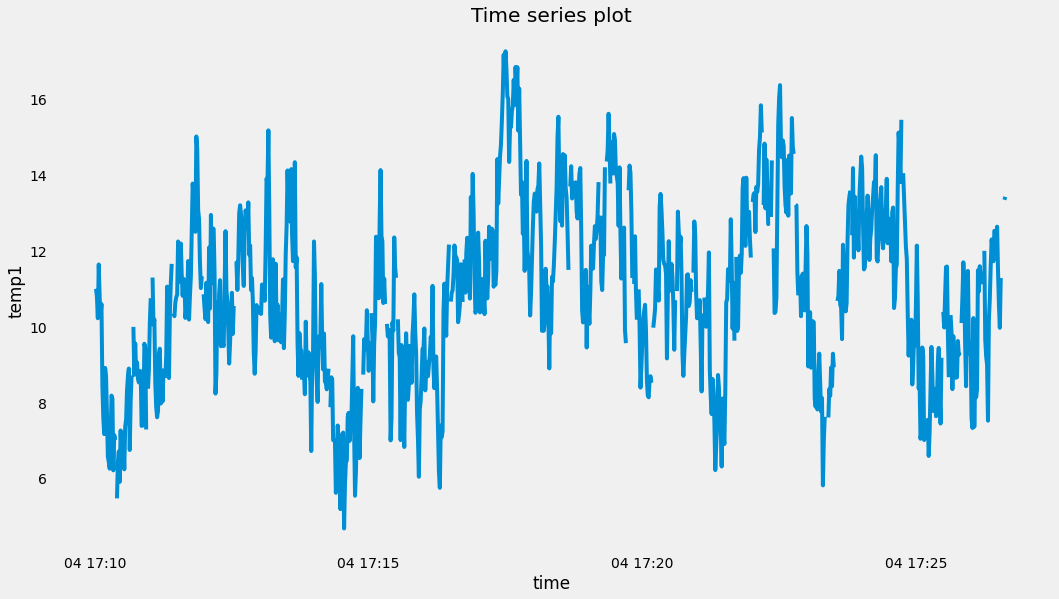

In [112]:
fig, ax = plot_timeseries(df=df_temp, x_col="time", y_col="temp1")

# Line plot is preferred here as it shows the development of temperature. It is also easier to view where the missing data is.

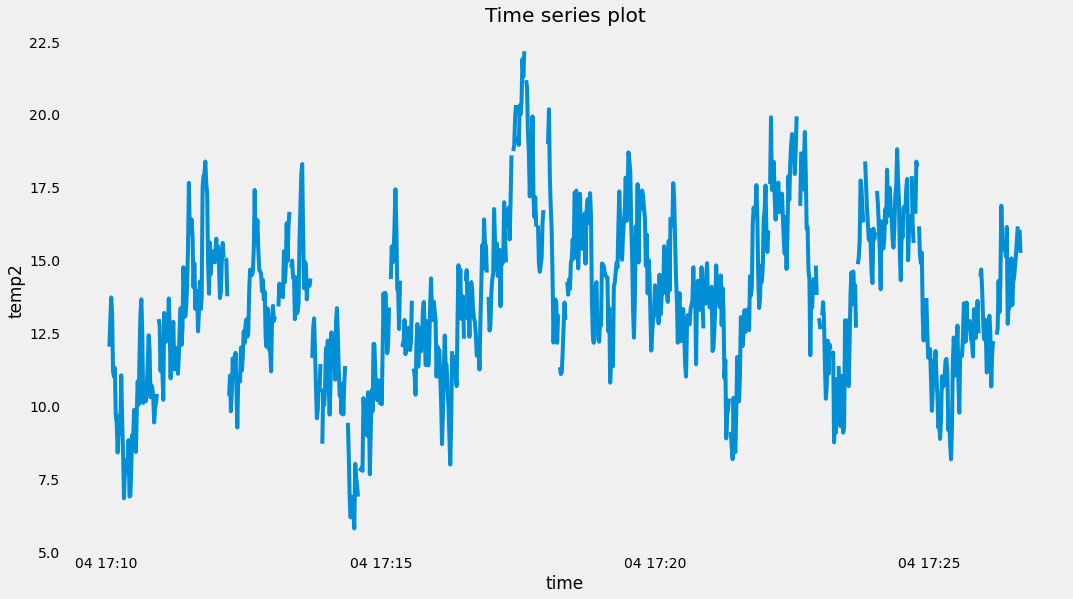

In [113]:
fig, ax = plot_timeseries(df=df_temp, x_col="time", y_col="temp2")

# Line plot is preferred here as it shows the development of temperature. It is also easier to view where the missing data is.

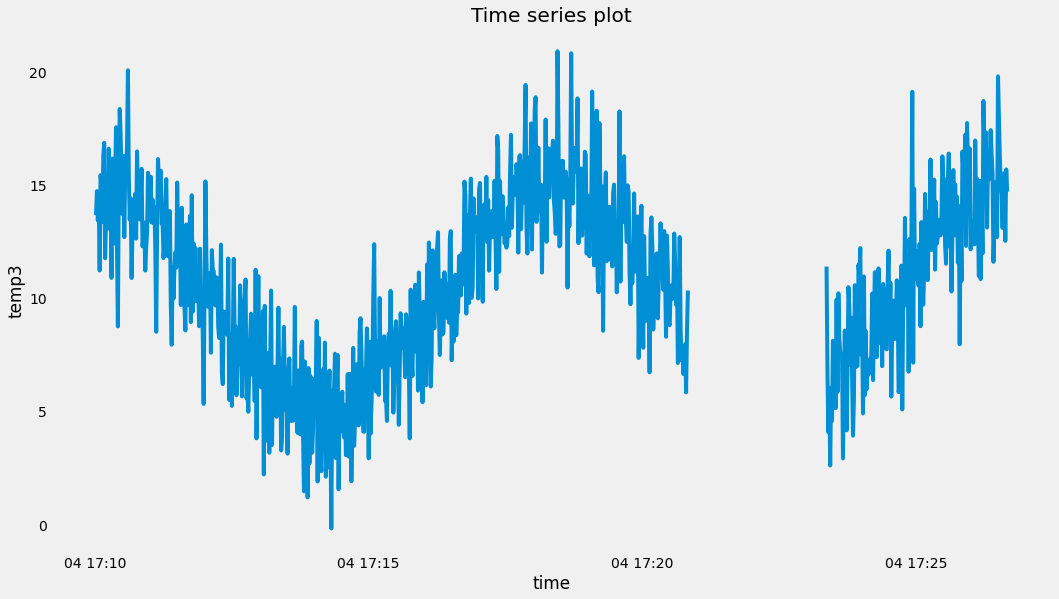

In [114]:
fig, ax = plot_timeseries(df=df_temp, x_col="time", y_col="temp3")

# Line plot is preferred here as it shows the development of temperature. It is also easier to view where the missing data is.

#### d) Explain in your own words how the data looks like. Don't be too specific, try to "explain" the big picture in 2-3 sentences. HINT: don't focus only on the missing data

In [115]:
# Temp1 & temp2 line plots seem to follow a similar pattern in temperature changes, while temp3 does not.
# Temp3 also has the most obvious gap where the missing data is.

#### e) Now create one figure with one axis element to visualise the temperature of signal 1 and 2 in one coordinate system. Don't forget to label your x- and y-axis

<AxesSubplot:xlabel='time'>

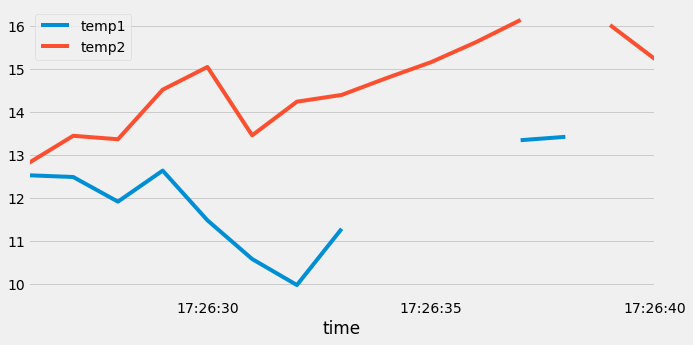

In [117]:
df_temp[-15:].plot(x='time', y=['temp1', 'temp2'], figsize=(10,5), grid=True)

# Couldn't find a way to integrate both temp1 & temp2 into one timeseries plot.

#### f) Describe in 1-2 sentences what you now see 

#### g) Create another figure to use a scatter plot to visualize temperature signal 1 and 2

#### h) There seems to be a pattern. Try to describe it in 1-2 sentences

#### i) What do you see if you plot the temperature of signal 1 against the temperature of signal 3. Use again a scatter plot and try to describe what you see

#### k) Visualize temperature signal 3 in a figure. Can you guess how the data was generated? Hint: have a look at https://mathworld.wolfram.com/Cosine.html 

#### l) To make the guessing easier, you try to visualize the temperature signal 3 and your guess in the same figure
Hints: 
- Use np.cos and/or np.sin and guess the intercept, amplitude and period 
- you must create a numpy.ndarray with exactly the same length as the dataframe of your experimental data  
- be careful when you used the time column for the values on the x-axis. It could be a good idea to create a new pandas.DataFrame with the time column and your guess signal 

#### l) Next week you'll have a meeting with the laboratory supervisor. You're not happy that your dataset contains some missing values. You think that it could be related sensor malfunction. Because you know that the laboratory supervisor doesn't like plain numbers, you try to come up with a nice visualisation that shows the percentage of missing values for each of the 3 temperature signals. If you need some inspiration have a look at https://matplotlib.org/stable/gallery/index.html

#### m) The laboratory supervisor doesn't like looking at plots in jupyter notebooks. To improve the likelihood that she'll have a look to see if there's something wrong with the temperature sensors you'll plan to create a nice slide deck. For that you need to export your visualisation (figure) as a png/pdf file. Hint: have a look at https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.savefig.html and save your figure as a png or pdf file. Make sure that you specify the path correctly and check if you're able to open the created file. Does the visualisation look good?

#### Bonus question: what would you do about the missing values of temperature signal 3? Are there any reasonable approaches to fill in values for missing timestamps? 